Welcome to my notebook which details how I treated the dataset to classify trees

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals import joblib

### Import data

In [5]:
path = "/Users/jean-baptiste/Documents/Cours/SD701 Big Data Mining/Kaggle/"
train = pd.read_csv(path + "train-set.csv", index_col=0)
dense_train = train.iloc[:, :10]
Y = train.iloc[:, -1]
test = pd.read_csv(path + "test-set.csv", index_col=0)
dense_test = test.iloc[:, :10]
cover_labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

### Explore data

In [6]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2611,326,20,120,27,1597,168,214,184,2913,...,0,0,0,0,0,0,0,0,0,6
2,2772,324,17,42,7,1814,175,220,183,2879,...,0,0,0,0,0,0,0,0,0,2
3,2764,4,14,480,-21,700,201,212,148,700,...,0,0,0,0,0,0,0,0,0,2
4,3032,342,9,60,8,4050,202,227,164,2376,...,0,0,0,0,0,0,0,0,0,2
5,2488,23,11,117,21,1117,209,218,151,1136,...,0,0,0,0,0,0,0,0,0,2


In [6]:
train.shape

(528720, 55)

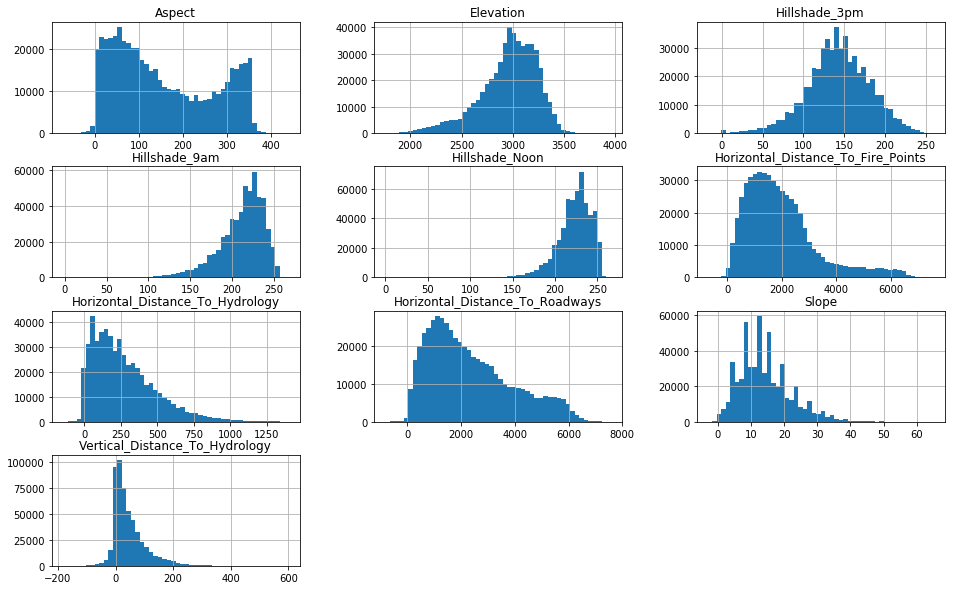

In [3]:
train.iloc[:,:10].hist(figsize=(16,10), bins=50)
plt.show()

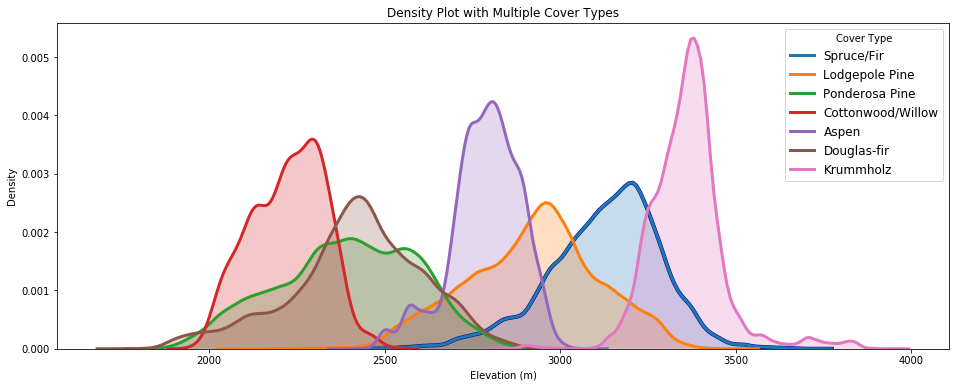

In [174]:
cover_type_index = [Y[Y == i].index - 1 for i in range(1, 8)]
elevation = [train.iloc[cover_type_index[i], 0].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(elevation[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = elevation[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Elevation (m)')
plt.ylabel('Density')
plt.show()

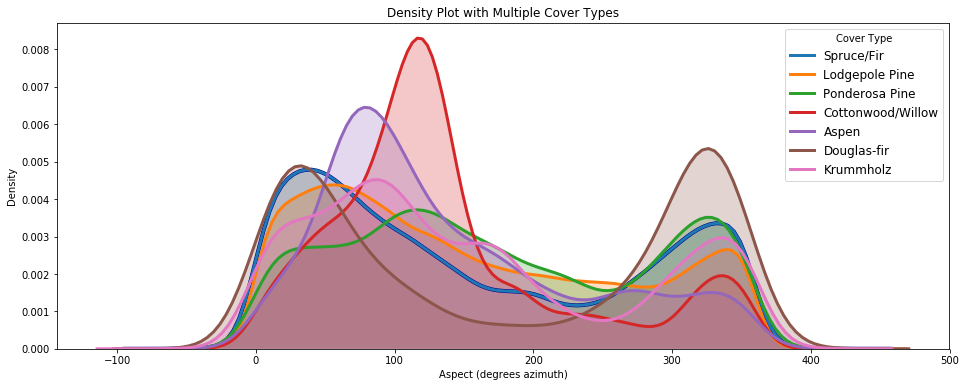

In [6]:
aspect = [train.iloc[cover_type_index[i], 1].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(aspect[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = aspect[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Aspect (degrees azimuth)')
plt.ylabel('Density')
plt.show()

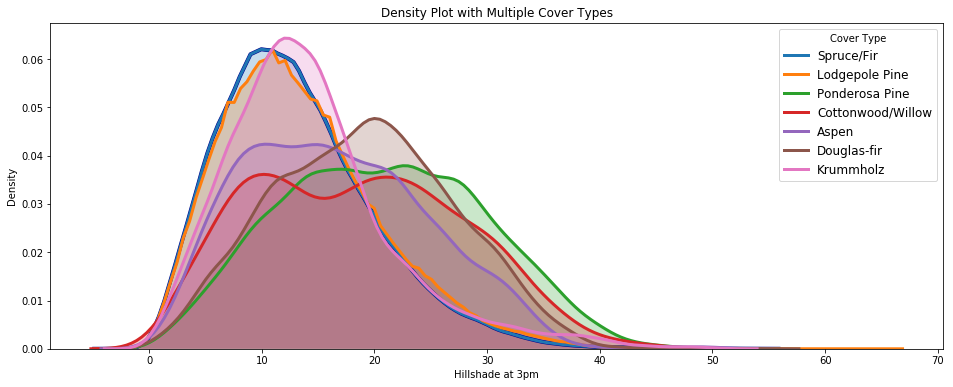

In [8]:
slope = [train.iloc[cover_type_index[i], 2].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(slope[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = slope[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Slope)
plt.ylabel('Density')
plt.show()

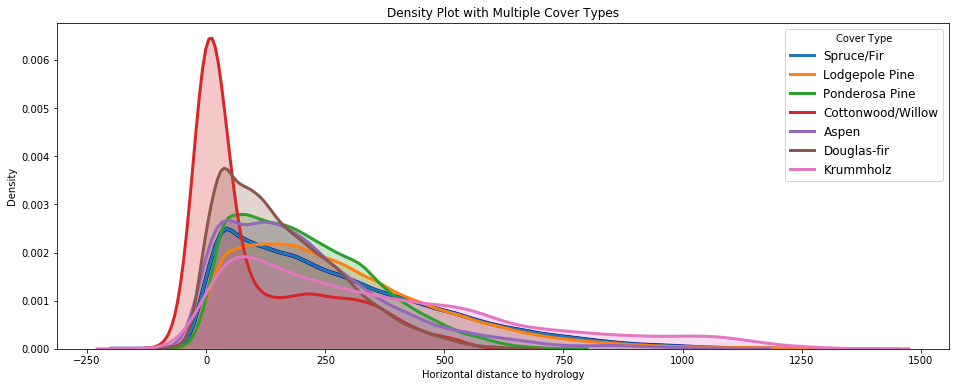

In [12]:
hd_hydro = [train.iloc[cover_type_index[i], 3].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(hd_hydro[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = hd_hydro[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Horizontal distance to hydrology')
plt.ylabel('Density')
plt.show()

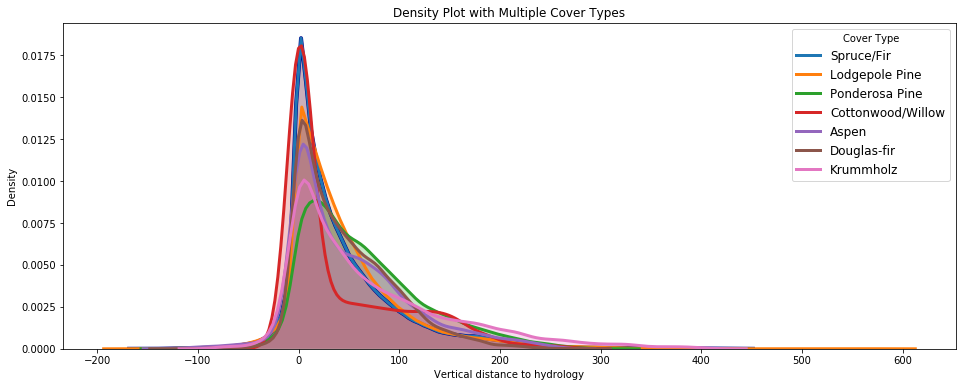

In [18]:
vd_hydro = [train.iloc[cover_type_index[i], 4].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(vd_hydro[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = vd_hydro[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Vertical distance to hydrology')
plt.ylabel('Density')
plt.show()

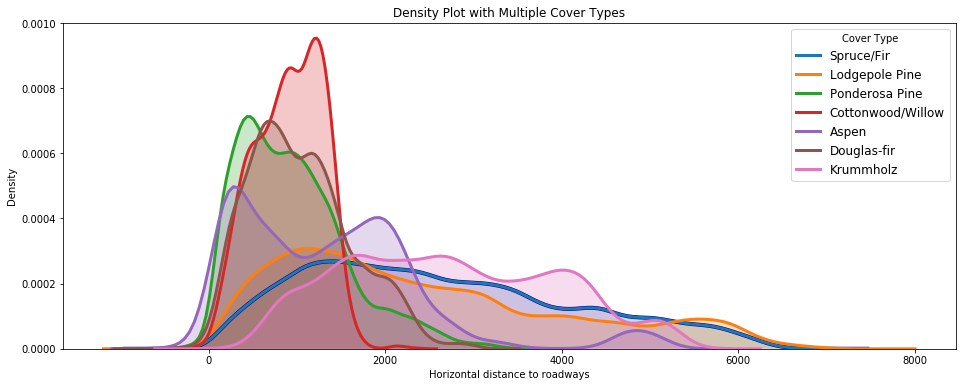

In [14]:
hd_roadways = [train.iloc[cover_type_index[i], 5].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(hd_roadways[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = hd_roadways[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Horizontal distance to roadways')
plt.ylabel('Density')
plt.show()

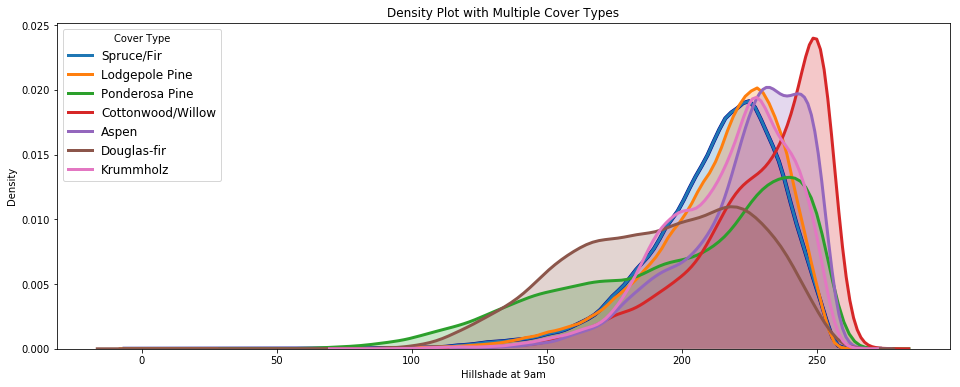

In [16]:
hillshade_9am = [train.iloc[cover_type_index[i], 6].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(hillshade_9am[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = hillshade_9am[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Hillshade at 9am')
plt.ylabel('Density')
plt.show()

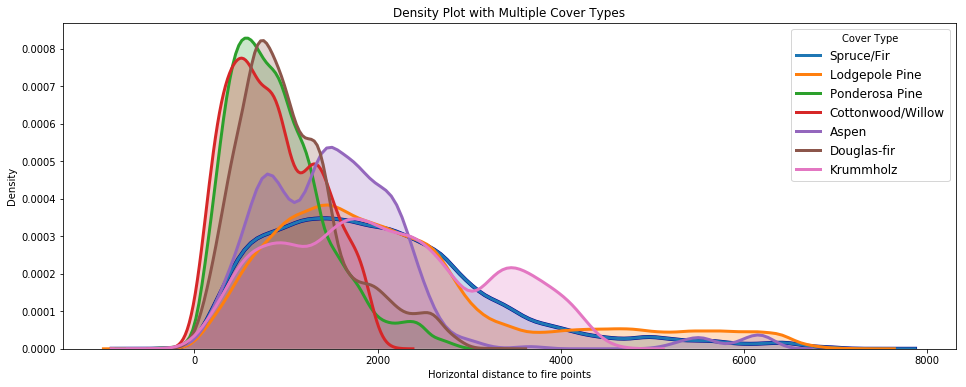

In [17]:
hd_fire = [train.iloc[cover_type_index[i], 9].values for i in range(7)]

plt.figure(figsize=(16, 6))
# Density Plot of all
sns.distplot(hd_fire[0], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})
# Iterate
for i in range(7):
    # Subset
    subset = hd_fire[i]
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = cover_labels[i])
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Cover Type')
plt.title('Density Plot with Multiple Cover Types')
plt.xlabel('Horizontal distance to fire points')
plt.ylabel('Density')
plt.show()

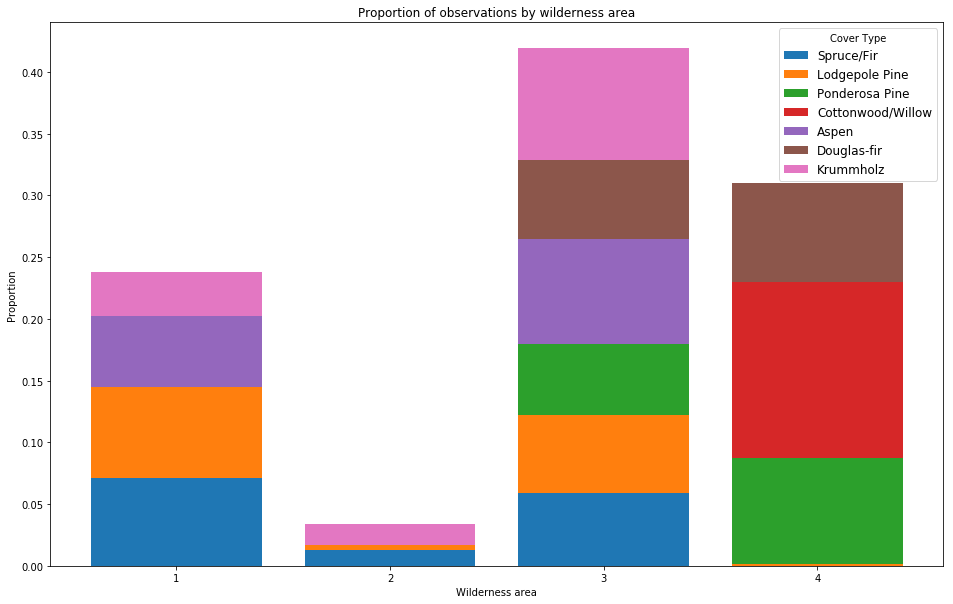

In [163]:
wilderness_area = train.iloc[:, [10, 11, 12, 13, -1]].groupby('Cover_Type').sum()
wilderness_area = wilderness_area.T / wilderness_area.T.sum().values
wilderness_area = wilderness_area.T / 7

plt.figure(figsize=(16, 10))
for i in range(1, 8):
    plt.bar(['1', '2', '3', '4'], wilderness_area.loc[i], bottom=wilderness_area.loc[1:i-1].sum())
plt.legend(cover_labels, prop={'size': 12}, title = 'Cover Type')
plt.title('Proportion of observations by wilderness area')
plt.xlabel('Wilderness area')
plt.ylabel('Proportion')
plt.show()

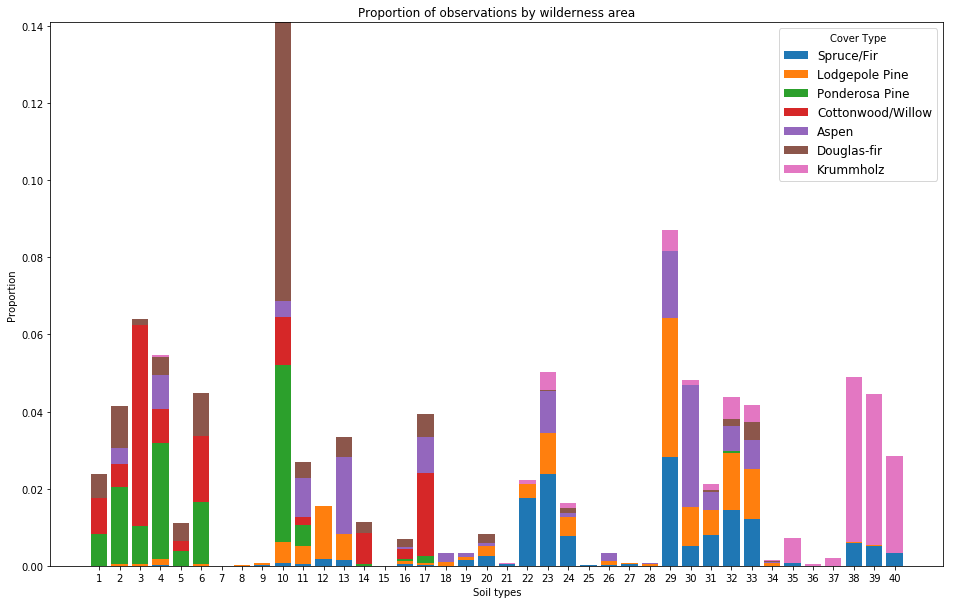

In [173]:
soil_type = train.iloc[:, -41:].groupby('Cover_Type').sum()
soil_type = soil_type.T / soil_type.T.sum().values
soil_type = soil_type.T / 7

plt.figure(figsize=(16, 10))
for i in range(1, 8):
    plt.bar([str(i) for i in range(1, 41)], soil_type.loc[i], bottom=soil_type.loc[1:i-1].sum())
plt.legend(cover_labels, prop={'size': 12}, title = 'Cover Type')
plt.title('Proportion of observations by wilderness area')
plt.xlabel('Soil types')
plt.ylabel('Proportion')
plt.show()

# Machine Learning 

Let's be honest: until now, I don't know that much about Machine Learning's algorithms and which one I should use. I know Random Forest often gives pretty good results so I used it.

## Random Forest

This is what I did to begin with. I only used the 10 first columns because adding the last 44 columns makes the calculations longer. And it doesn't provide much more information as it only indicates two things: soil type and wilderness area.

In [19]:
rf_initial=RandomForestClassifier(n_estimators=20, bootstrap=True, oob_score=True)
rf_initial.fit(dense_train.values, Y.values)
print("Initial Traincsv score: %.5f" %rf_initial.score(dense_train.values, Y.values))

/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Initial Traincsv score: 0.99930


In [21]:
joblib.dump(rf_initial, 'rf_ini.joblib') 

['rf_ini.joblib']

In [18]:
#Make a copy of the test.csv file
result=dense_test.copy()
#Run Predictions on test.csv
result['Cover_Type']=rf_initial.predict(result.values)
#Create Submissions csv file
result=result['Cover_Type']
result.to_csv('RF.csv', header=True)

#### Understand better our algorithm

In [ ]:
rf_initial = joblib.load('rf_ini.joblib') 

In [54]:
# Cover_types not guessed
prediction=rf_initial.predict(dense_train.values)
bad_pred = pd.Series(prediction[prediction - Y != 0], index=Y[prediction - Y != 0].index)
errors = bad_pred.to_frame('pred').join(Y[prediction - Y != 0].to_frame())

In [65]:
errors.groupby(['Cover_Type', 'pred']).size().sort_values(ascending=False).head(5)

Cover_Type  pred
2           1       138
1           2        76
5           2        42
7           1        34
3           2        21
dtype: int64

#### Priority is to differentiate better #1 and #2 : Spruce/Fir and Lodgepole Pine

In [78]:
fault_index = errors[(errors['Cover_Type'] == 1) | (errors['Cover_Type'] == 2)].index.tolist()

In [85]:
train.loc[fault_index, :].iloc[:, 10:14].sum()

Wilderness_Area1    103
Wilderness_Area2     14
Wilderness_Area3    104
Wilderness_Area4      1
dtype: int64

In [13]:
train.loc[fault_index, :].iloc[:, -41:].groupby('Cover_Type').sum().T

NameError: name 'fault_index' is not defined

I'am looking at which wilderness areas and soil types the bad predicted Spruce/Fir and Lodgepole Pine belong.

They mainly belong to wilderness areas #1 and #2 but looking at the repartition of the trees among wilderness areas, we see that willderness areas #1 and #2 have the same repartition of Spruce/Fir and Lodgepole Pine. So it doesn't help.

They mainly belong to Soil types 23, 29, 32 and 33. But looking at the repartition of trees in the last 3, we see that they have as much Spruce/Fir and Lodgepole Pine. However the type 23 is mainly made of Spruce/Fir.

#### => Soil_Type23 may help to split Spruce/Fir and Lodgepole Pine!

We have added Soil_type23 to the train data used fo our algorithm

In [104]:
liste = list(range(10))
liste.append(36)
dense_train = train.iloc[:, liste]
rf2=RandomForestClassifier(n_estimators=20, bootstrap=True, oob_score=True)
rf2.fit(dense_train.values, Y.values)
print("Initial Traincsv score: %.5f" %rf2.score(dense_train.values, Y.values))

/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Initial Traincsv score: 0.99938


The result increased a little bit as expected

## Parameters tuning

To improve my Random Forest algorithm as my computer is not a Formula 1, I took advantage of computers at school.
The aim was parameters tuning so I cross validated different parameters each one on a different computer using ssh.

In [128]:
rf2=RandomForestClassifier(n_estimators=80, max_depth=50, bootstrap=True, oob_score=True, n_jobs=-1, max_features=None)
scores = cross_val_score(rf2, dense_train.values, Y.values, cv=5)

In [127]:
scores_rf_23_80esti_50depth

array([0.92240042, 0.92198213, 0.92320132, 0.92151652, 0.92239529])

In [132]:
scores_rf_23_80esti_100depth

[0.9229489, 0.92289943, 0.92285141, 0.92113824, 0.9222156]

In [133]:
scores_rf_23_80esti_100depth_Nonemaxf

[0.92853766, 0.92749539, 0.92798646, 0.92718125, 0.92822084]

In [124]:
scores_rf_23_50esti_50depth

array([0.9209725 , 0.9213769 , 0.92164094, 0.91927522, 0.92011613])

In [121]:
scores_rf_23_30esti_50depth

array([0.91861785, 0.91865336, 0.91974013, 0.91734599, 0.91814906])

In [118]:
scores_rf_23_30esti

array([0.9181072 , 0.91810487, 0.91936186, 0.91737436, 0.91743033])

In [114]:
scores_rf_23_20esti

array([0.91449484, 0.91570287, 0.9157399 , 0.91361994, 0.91515117])

In [134]:
rf_final=RandomForestClassifier(n_estimators=80, max_depth=100, bootstrap=True, oob_score=True, n_jobs=-1, max_features=None)
dense_train = train.iloc[:, liste]
rf_final.fit(dense_train.values, Y.values)
print("Initial Traincsv score: %.5f" %rf_final.score(dense_train.values, Y.values))

Initial Traincsv score: 0.99999


In [135]:
#Make a copy of the test.csv file
result=test.iloc[:, liste].copy()
#Run Predictions on test.csv
result['Cover_Type']=rf_final.predict(result.values)
#Create Submissions csv file
result=result['Cover_Type']
result.to_csv('RF-final.csv', header=True)

In [107]:
joblib.dump(rf_final, 'rf2.joblib')

['rf2.joblib']

In [ ]:
rf_final = joblib.load('rf2.joblib') 

## ExtraTrees

I wanted to see if I could improve my results with Extra Trees. The results looked better at first glance but did not improve my score while submitting.

In [25]:
liste = list(range(10))
liste.append(36)
dense_train = train.iloc[:, liste]
etc=ExtraTreesClassifier(n_estimators=120, max_depth=120, bootstrap=True, oob_score=True, n_jobs=-1, max_features=None)
scores = cross_val_score(etc, dense_train.values, Y.values, cv=5)

In [10]:
scores_et_23_80esti_100depth_Nonemaxf

array([0.92978591, 0.92978391, 0.93204343, 0.92844849, 0.92962994])

In [24]:
scores_et_23_100esti_80depth_Nonemaxf

array([0.93074101, 0.9303324 , 0.93156113, 0.92988595, 0.93067022])

In [16]:
scores_et_23_80esti_120depth_Nonemaxf

array([0.93091122, 0.93069176, 0.93136254, 0.92904428, 0.92997986])

In [20]:
scores_et_23_80esti_150depth_Nonemaxf

array([0.9314597 , 0.93045534, 0.93176918, 0.92938473, 0.92948809])

In [29]:
scores_et_23_120esti_120depth_Nonemaxf

array([0.93165828, 0.93162797, 0.93220419, 0.92972518, 0.93031085])

In [62]:
etc=ExtraTreesClassifier(n_estimators=120, max_depth=120, bootstrap=True, oob_score=True, n_jobs=-1, max_features=None)
etc.fit(dense_train.values, Y.values)

#Make a copy of the test.csv file
test1=test.iloc[:, liste].copy()
#Run Predictions on test.csv
result_etc['Cover_Type']=etc.predict(result_etc.values)
#Create Submissions csv file
result_etc=result_etc['Cover_Type']
result_etc.to_csv('ETC.csv', header=True)

In [65]:
result_etc=test.iloc[:, liste].copy()
etc_probas = etc.predict_proba(test1.values)

In [66]:
rfc=RandomForestClassifier(n_estimators=120, max_depth=120, bootstrap=True, oob_score=True, n_jobs=-1, max_features=None)
rfc.fit(dense_train.values, Y.values)

#Make a copy of the test.csv file
test1=test.iloc[:, liste].copy()
#Run Predictions on test.csv
result_rfc['Cover_Type']=etc.predict(result_rfc.values)
#Create Submissions csv file
result_rfc=result_rfc['Cover_Type']
result_rfc.to_csv('RFC.csv', header=True)

In [67]:
test1=test.iloc[:, liste].copy()
rfc_probas = rfc.predict_proba(test1.values)